In [1]:
from pandas import read_csv
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from yellowbrick.regressor.alphas import alphas

In [2]:
# Load dataset
dataframe = read_csv('mystery.dat', header = None, sep = ',')

print('Shape of the mystery data:\n', dataframe.shape)
print('\nHead of the mystery data:\n', dataframe.head())

Shape of the mystery data:
 (101, 101)

Head of the mystery data:
        0        1        2        3        4        5        6        7    \
0  0.63311 -1.71313 -0.48056 -0.32540 -0.05102  0.05634 -1.63462 -0.58081   
1  0.82710 -0.45099  0.62209 -0.24694  0.53069  0.84492  0.37463 -0.61650   
2 -0.25135 -0.22821 -0.65147  0.52365 -0.58971  0.02787  0.27812  0.21289   
3  0.46192  0.16546  2.87388 -0.65411  0.76601  1.54346 -1.08101 -1.00728   
4 -1.50107  2.05339  0.03820  0.27116 -0.07920 -0.53648  0.32249 -0.57844   

       8        9    ...      91       92       93       94       95   \
0  0.70627 -2.06938  ...  0.69346  0.49371 -0.15578  1.02650  0.48640   
1 -0.00887  0.51328  ...  1.12702  0.53821  1.69800  0.65812  0.18004   
2  1.08754 -0.28801  ... -0.08484  0.00259  1.98580  0.39629 -1.37305   
3 -0.01883  0.41995  ...  0.72389  1.27442 -0.69487  0.47128  0.54426   
4 -0.66211 -0.73749  ...  0.07916 -0.34523  1.09813  1.78102 -1.06170   

       96       97       98    

In [3]:
# Separate features from labels 
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

# Divide into training and test set 
x_train,x_test,y_train,y_test = train_test_split(X,y, random_state = 3, test_size = 0.2)

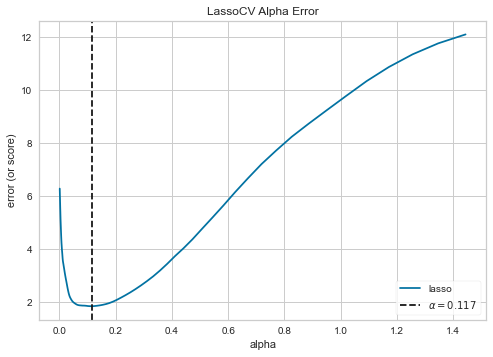

AlphaSelection(ax=<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>,
               estimator=LassoCV(random_state=0))

In [4]:
# Find the best alpha
alphas(LassoCV(random_state = 0), X, y)

In [5]:
# Evaluate an lasso regression model on the dataset
# When I apply the best alpha value 0.117 above, it only select 7 features.
# So here, I modified the alpha value to fit the requirement of this question for 10 features.
lasso = Lasso(alpha = 0.07, normalize = True)
lasso.fit(x_train,y_train)
predict = lasso.predict(x_test)

print('Lasso score:\n',lasso.score(x_test,y_test))
print('\nLasso coefficients:\n',lasso.coef_)

Lasso score:
 0.43029417215164845

Lasso coefficients:
 [-0.          0.62526249  0.44797675 -0.          0.69402542  0.
  0.77809284  0.         -0.          0.          0.35679046  0.
  0.01922474 -0.         -0.          0.          0.02210121  0.
  0.3265981  -0.          0.          0.          0.73002793 -0.
  0.         -0.          0.3514545   0.          0.          0.
  0.         -0.         -0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.          0.          0.
  0.         -0.         -0.          0.          0.         -0.
 -0.          0.          0.          0.          0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
  0.          0.          0.      

### (a) Explain your strategy in one or two sentences. Hint: you will find it helpful to look over the routines in sklearn.linear model.

For this question, I will use Lasso regression model to select features, which is a regression method that involves penalizing the absolute size of the regression coefficients. By penalizing, we end up in a situation where some of the parameter estimates may be exactly zero, so the larger the penalty applied, the further estimates are shrunk towards zero.

### (b) Which ten features did you identify? You need only give their coordinate numbers, from 1 to 100.

In [6]:
# Find the coordinate numbers
num = np.where(lasso.coef_ != 0)

# Since the coordinate numbers are from 1 to 100, not the index 0 to 99,
# so I add one to the num[0].
print('Coordinate numbers for ten features:\n', num[0] + 1)

Coordinate numbers for ten features:
 [ 2  3  5  7 11 13 17 19 23 27]
